In [ ]:
# Aim: how tinitus and demog data contirbute to mental health

# dataset: Dr. Zahra Jafari's dataset

#date: 
# start: 12_27_2023



In [213]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import numpy as np


In [200]:
jafari_df= pd.read_excel("Tinnitus_00_ZJ.xlsx")

In [6]:
jafari_df

,Age,Sex,Years of Education,Tinnitus place,Tinnitus year of experience,Tinnitus onset,Tinnitus type,HL,Ability to cope with tinnitus,Underlying diseases,...,Depression grade,Insomnia score,Insomnia gade,Right Ear Hearing Loss Average,Left Ear Hearing Loss Average,PTA or average of hearing loss,Hearing loss severity,Hearing loss (yes or no),Unnamed: 38,"Sex: Male=1, Female 2"
0,60,1,10,2,10,1,2,1,1,2,...,1,9,2,23.000000,23.333333,23.166667,1,1,NaN,"Tinnitus place: both ears=1, right=2, left=3, ..."
1,62,1,12,1,12,1,2,1,1,2,...,2,11,2,35.000000,35.000000,35.000000,2,2,NaN,"Tinnitus onset: gradually=1, abruptly=2"
2,75,2,14,3,14,1,2,2,1,1,...,2,19,3,53.333333,53.333333,53.333333,3,2,NaN,"Tinnitus type: constant=1, intermittent=2"
3,75,1,12,2,17,1,2,2,1,1,...,1,5,1,55.000000,46.666667,50.833333,3,2,NaN,"Hearing loss: yeas=1, no=2"
4,70,2,12,1,25,1,2,1,2,2,...,1,8,2,53.333333,53.333333,53.333333,3,2,NaN,"Ability to cope with tinnitus: yes=1, no=2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,64,1,12,1,1,2,1,1,2,1,...,2,18,3,43.333333,41.666667,42.500000,2,2,NaN,NaN
71,30,1,16,1,12,2,1,2,2,2,...,1,2,1,5.000000,2.000000,3.500000,1,1,NaN,NaN
72,68,1,14,4,15,2,1,1,2,1,...,1,7,1,63.333333,76.666667,70.000000,5,2,NaN,NaN
73,51,1,16,4,8,2,1,1,2,2,...,1,2,1,31.666667,20.000000,25.833333,1,1,NaN,NaN


In [8]:
jafari_df.columns

Index(['Age', 'Sex', 'Years of Education', 'Tinnitus place',
       'Tinnitus year of experience', 'Tinnitus onset', 'Tinnitus type', 'HL',
       'Ability to cope with tinnitus', 'Underlying diseases', 'Disease name',
       'Medication experience', 'Medication name',
       'History of longterm noise exposure', 'Stress', 'Tinnitus pitch',
       'Tinnitus loudness', 'Tinnitus annoyance', 'Impact of tinnitus on QoL',
       'Family history', 'Past therapy for tinnitus', 'THI score', 'THI grade',
       'Hyperacusis score', 'Hyperacusis grade', 'HADS score', 'HADS grade',
       'Anxiety score', 'Anxiety grade', 'Depression score',
       'Depression grade', 'Insomnia score', 'Insomnia gade',
       'Right Ear Hearing Loss Average', 'Left Ear Hearing Loss Average',
       'PTA or average of hearing loss', 'Hearing loss severity',
       'Hearing loss (yes or no)', 'Unnamed: 38', 'Sex: Male=1, Female 2'],
      dtype='object')

In [46]:
demog_cols= ['Age', 'Sex', 'Underlying diseases', "Stress"  ]
audio_tinitus_cols= ['Tinnitus place', 
                     "Tinnitus year of experience",
                     'Ability to cope with tinnitus', 
                     'History of longterm noise exposure',
                     'Tinnitus loudness',
                     'Tinnitus annoyance',
                     "THI score", 
                     'Hyperacusis score',
                      'Hearing loss (yes or no)',
                     'PTA or average of hearing loss',
                     'Impact of tinnitus on QoL'
                    ]
mental_health_grade_cols= ['HADS grade',
                           'Anxiety grade', 
                           'Depression grade',  
                           'Insomnia gade']

mental_health_score_cols= ['HADS score', 
                           'Anxiety score', 
                           'Depression score',
                           'Insomnia score']

In [47]:
# Correlation analysis

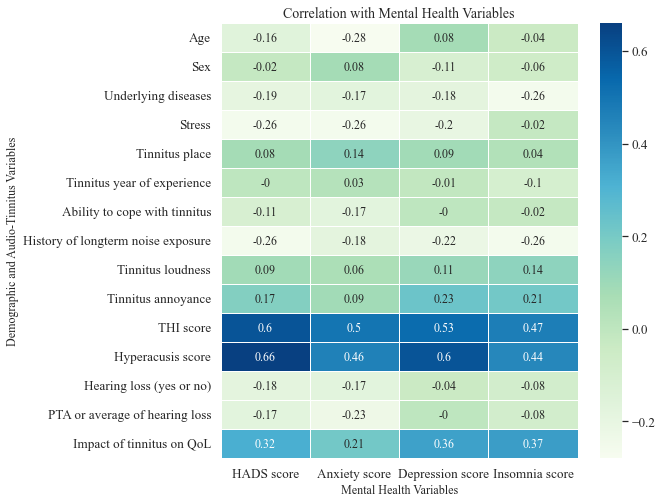

In [63]:
# Selecting only the relevant columns
relevant_cols = demog_cols + audio_tinitus_cols + mental_health_cols
df_relevant = jafar_df[relevant_cols]

# Calculating correlation
corr_matrix = df_relevant.corr().round(2)

# Selecting only the correlations with mental health columns
corr_with_mental_health = corr_matrix.loc[demog_cols + audio_tinitus_cols, mental_health_score_cols]
# Setting the style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Plotting the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(corr_with_mental_health, annot=True, cmap='GnBu', linewidths=.5)
plt.title("Correlation with Mental Health Variables", fontsize=14)
plt.ylabel("Demographic and Audio-Tinnitus Variables", fontsize=12)
plt.xlabel("Mental Health Variables", fontsize=12)
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')

plt.show()


In [187]:
# Calculate and print Spearman correlation coefficients and p-values
for col1 in demog_cols + audio_tinitus_cols:
    for col2 in mental_health_score_cols:
        coef, p = spearmanr(df_relevant[col1], df_relevant[col2])
        print(f"Spearman correlation between {col1} and {col2}: Coefficient = {coef}, P-value = {p}")
    


Spearman correlation between Age and HADS score: Coefficient = -0.13522868310904695, P-value = 0.24736739586300147
Spearman correlation between Age and Anxiety score: Coefficient = -0.2392115153629069, P-value = 0.03873892245296341
Spearman correlation between Age and Depression score: Coefficient = 0.006357408086302221, P-value = 0.9568295427951514
Spearman correlation between Age and Insomnia score: Coefficient = -0.06139871144654725, P-value = 0.6007712811913917
Spearman correlation between Sex and HADS score: Coefficient = 0.017320838124293223, P-value = 0.8827417585518874
Spearman correlation between Sex and Anxiety score: Coefficient = 0.09359662197627532, P-value = 0.42445757562750397
Spearman correlation between Sex and Depression score: Coefficient = -0.07721145509528916, P-value = 0.5102658306505731
Spearman correlation between Sex and Insomnia score: Coefficient = -0.04671697349566955, P-value = 0.690627995646795
Spearman correlation between Underlying diseases and HADS scor

In [185]:
# Signifiant columns
# Calculate and print Spearman correlation coefficients and p-values
for col1 in demog_cols + audio_tinitus_cols:
    for col2 in mental_health_score_cols:
        coef, p = spearmanr(df_relevant[col1], df_relevant[col2])
        if p <0.05: 
            print({col1})
    


{'Age'}
{'Underlying diseases'}
{'Stress'}
{'Stress'}
{'History of longterm noise exposure'}
{'THI score'}
{'THI score'}
{'THI score'}
{'THI score'}
{'Hyperacusis score'}
{'Hyperacusis score'}
{'Hyperacusis score'}
{'Hyperacusis score'}
{'PTA or average of hearing loss'}
{'Impact of tinnitus on QoL'}
{'Impact of tinnitus on QoL'}
{'Impact of tinnitus on QoL'}


In [65]:
audio_tinitus_cols

['Tinnitus place',
 'Tinnitus year of experience',
 'Ability to cope with tinnitus',
 'History of longterm noise exposure',
 'Tinnitus loudness',
 'Tinnitus annoyance',
 'THI score',
 'Hyperacusis score',
 'Hearing loss (yes or no)',
 'PTA or average of hearing loss',
 'Impact of tinnitus on QoL']

In [76]:
mental_health_score_cols

['HADS score', 'Anxiety score', 'Depression score', 'Insomnia score']

In [129]:
X= df_relevant[demog_cols+audio_tinitus_cols]
y_depression_score= df_relevant["Depression grade"]

In [130]:
X

,Age,Sex,Underlying diseases,Stress,Tinnitus place,Tinnitus year of experience,Ability to cope with tinnitus,History of longterm noise exposure,Tinnitus loudness,Tinnitus annoyance,THI score,Hyperacusis score,Hearing loss (yes or no),PTA or average of hearing loss,Impact of tinnitus on QoL
0,60.0,1.0,2.0,1.0,2.0,10.0,1.0,1.0,4.0,2.0,32.0,8.0,1.0,23.17,2.0
1,62.0,1.0,2.0,1.0,1.0,12.0,1.0,1.0,6.0,8.0,42.0,33.0,2.0,35.00,8.0
2,75.0,2.0,1.0,1.0,3.0,14.0,1.0,1.0,6.0,6.0,52.0,28.0,2.0,53.33,6.0
3,75.0,1.0,1.0,2.0,2.0,17.0,1.0,1.0,7.0,5.0,8.0,9.0,2.0,50.83,4.0
4,70.0,2.0,2.0,2.0,1.0,25.0,2.0,1.0,8.0,7.0,37.0,9.0,2.0,53.33,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,64.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,30.0,11.0,2.0,42.50,3.0
71,30.0,1.0,2.0,2.0,1.0,12.0,2.0,2.0,3.0,5.0,30.0,7.0,1.0,3.50,5.0
72,68.0,1.0,1.0,2.0,4.0,15.0,2.0,2.0,8.0,8.0,32.0,5.0,2.0,70.00,4.0
73,51.0,1.0,2.0,2.0,4.0,8.0,2.0,2.0,3.0,4.0,22.0,11.0,1.0,25.83,3.0


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [132]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y_depression_score, X)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Depression grade   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     5.409
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           1.15e-06
Time:                        18:07:19   Log-Likelihood:                -36.055
No. Observations:                  75   AIC:                             104.1
Df Residuals:                      59   BIC:                             141.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_depression_score, test_size=0.3, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 10.701704403333116
R^2 Score: 0.004711387242753218


In [88]:
# PLS
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

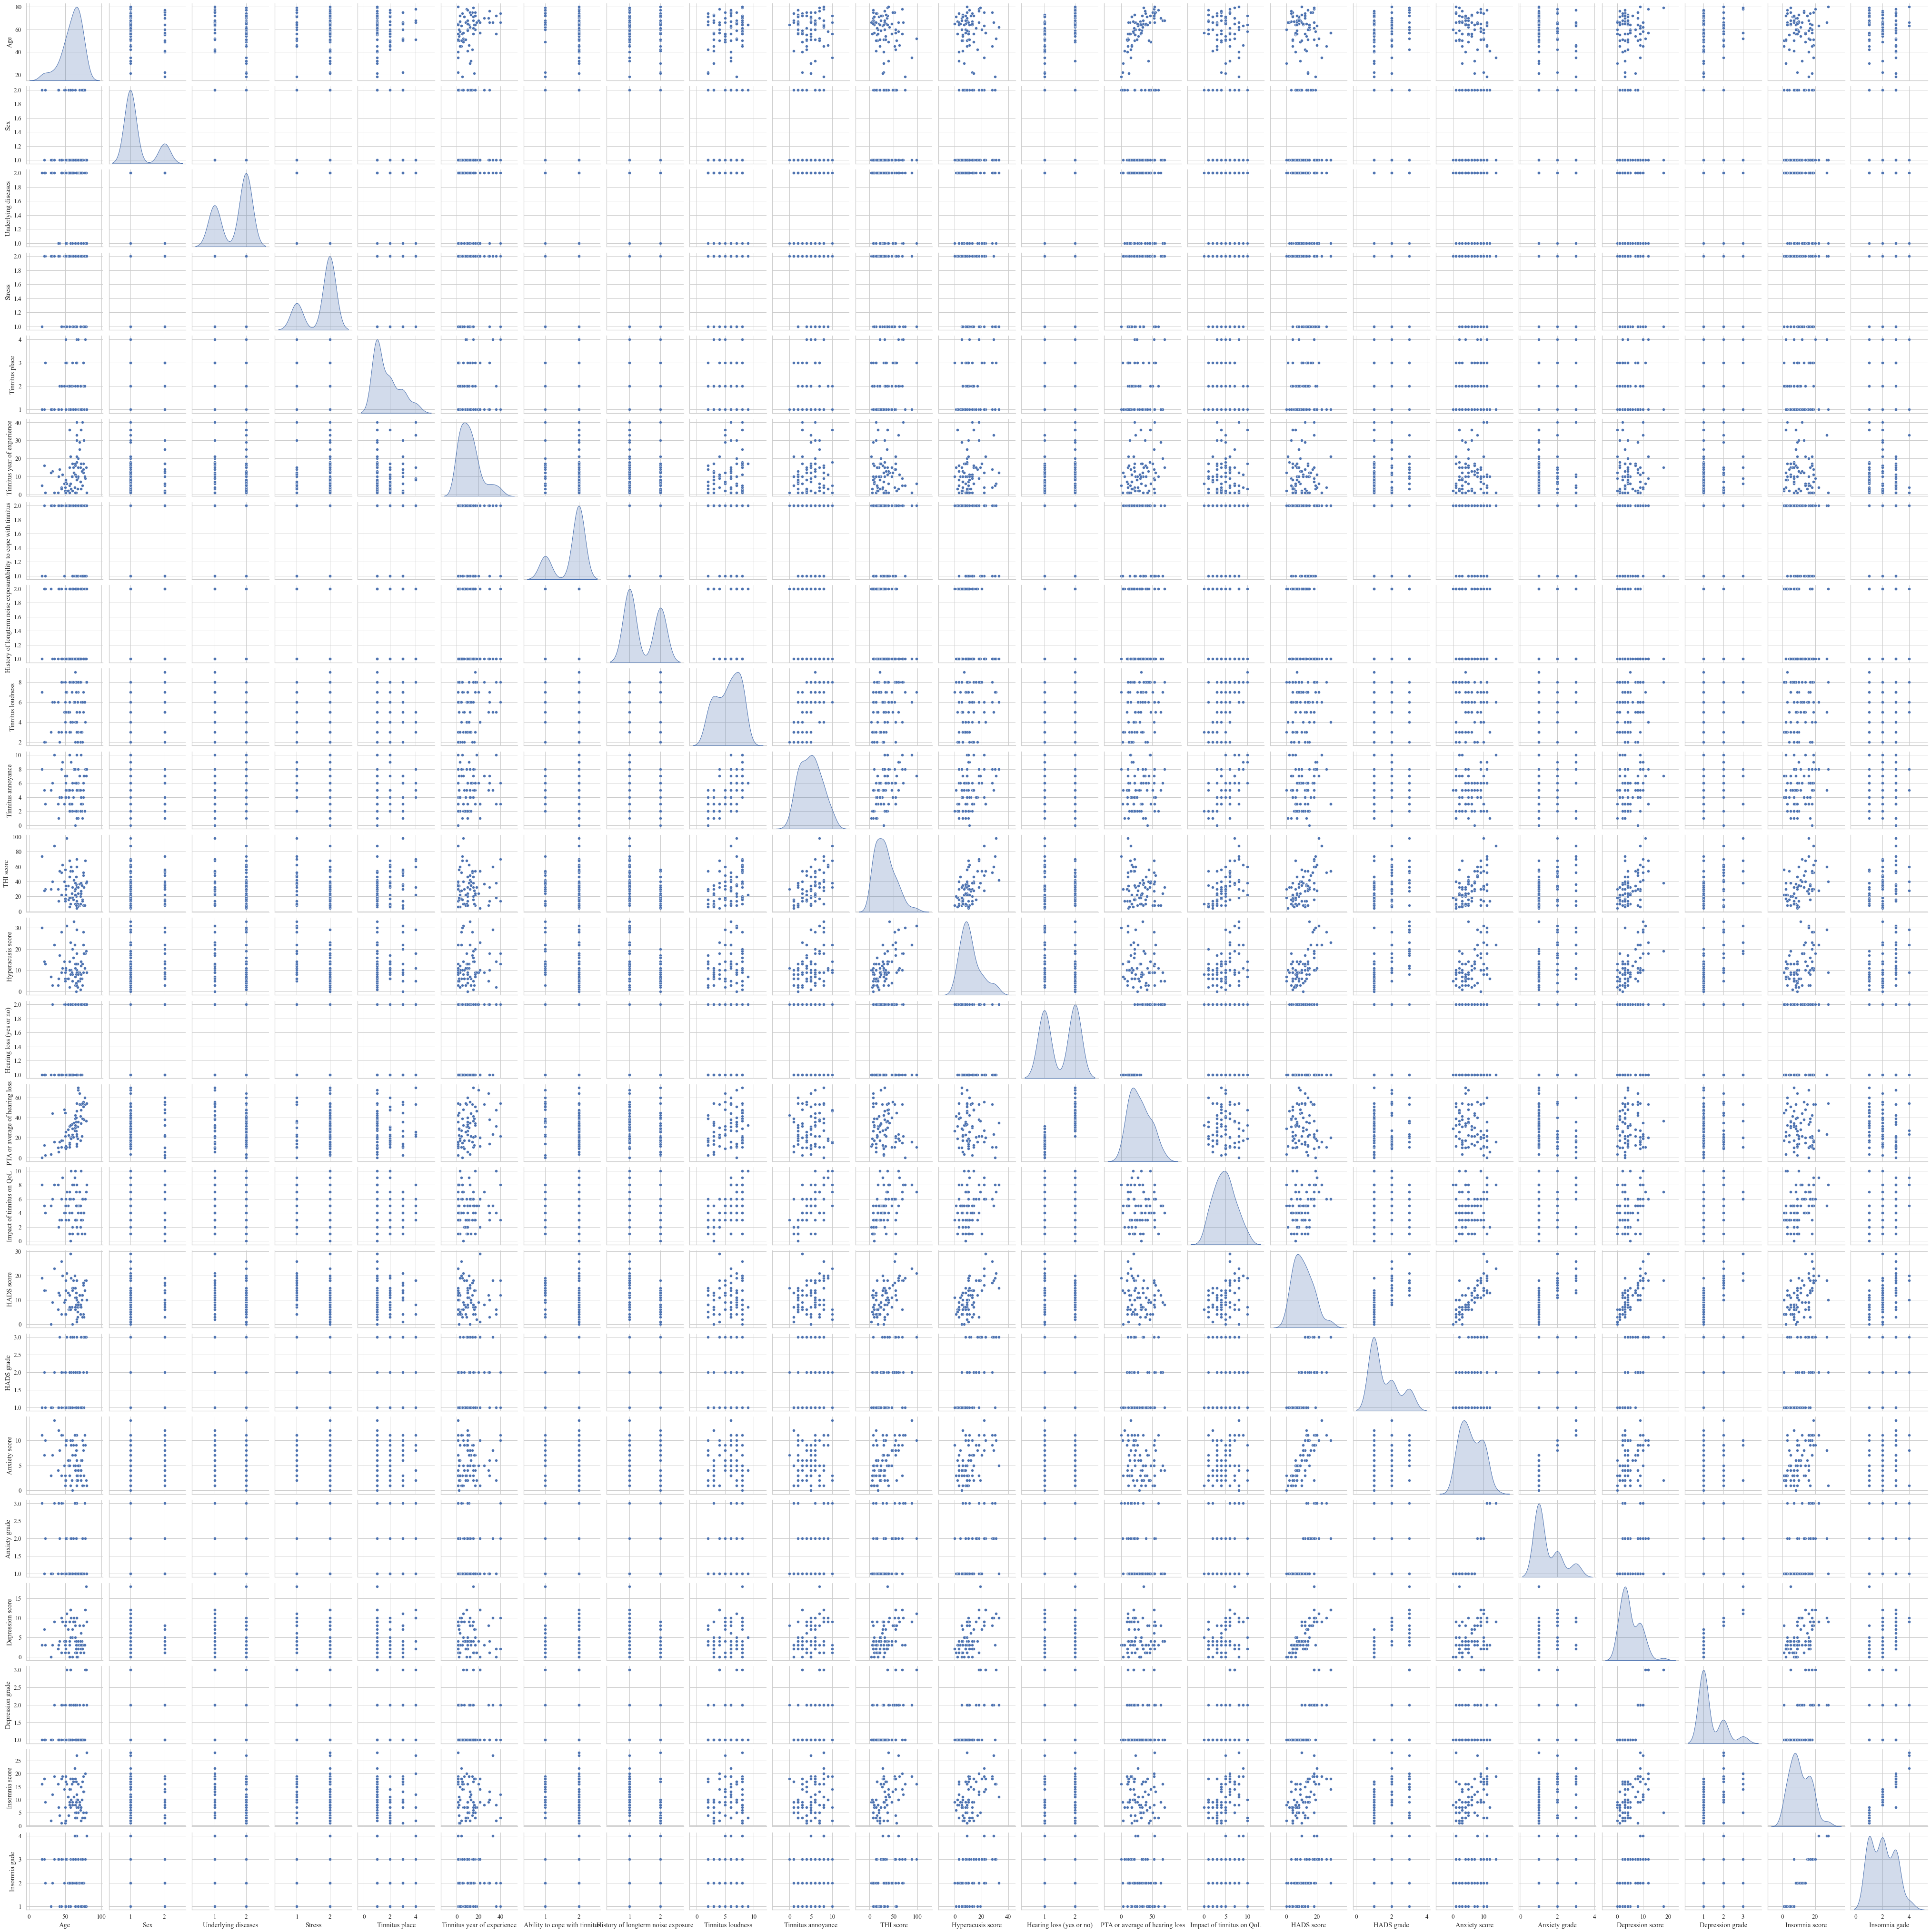

In [97]:
sns.pairplot(data=df_relevant, diag_kind='kde')


In [101]:
df_relevant= df_relevant.astype("float").round(2)
df_relevant

,Age,Sex,Underlying diseases,Stress,Tinnitus place,Tinnitus year of experience,Ability to cope with tinnitus,History of longterm noise exposure,Tinnitus loudness,Tinnitus annoyance,...,PTA or average of hearing loss,Impact of tinnitus on QoL,HADS score,HADS grade,Anxiety score,Anxiety grade,Depression score,Depression grade,Insomnia score,Insomnia gade
0,60.0,1.0,2.0,1.0,2.0,10.0,1.0,1.0,4.0,2.0,...,23.17,2.0,15.0,3.0,10.0,2.0,5.0,1.0,9.0,2.0
1,62.0,1.0,2.0,1.0,1.0,12.0,1.0,1.0,6.0,8.0,...,35.00,8.0,15.0,3.0,5.0,1.0,10.0,2.0,11.0,2.0
2,75.0,2.0,1.0,1.0,3.0,14.0,1.0,1.0,6.0,6.0,...,53.33,6.0,17.0,3.0,9.0,2.0,8.0,2.0,19.0,3.0
3,75.0,1.0,1.0,2.0,2.0,17.0,1.0,1.0,7.0,5.0,...,50.83,4.0,4.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0
4,70.0,2.0,2.0,2.0,1.0,25.0,2.0,1.0,8.0,7.0,...,53.33,7.0,8.0,2.0,5.0,1.0,3.0,1.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,64.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,...,42.50,3.0,15.0,2.0,7.0,1.0,8.0,2.0,18.0,3.0
71,30.0,1.0,2.0,2.0,1.0,12.0,2.0,2.0,3.0,5.0,...,3.50,5.0,0.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0
72,68.0,1.0,1.0,2.0,4.0,15.0,2.0,2.0,8.0,8.0,...,70.00,4.0,8.0,1.0,4.0,1.0,4.0,1.0,7.0,1.0
73,51.0,1.0,2.0,2.0,4.0,8.0,2.0,2.0,3.0,4.0,...,25.83,3.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0


In [170]:
audio_tinitus_cols

['Tinnitus place',
 'Tinnitus year of experience',
 'Ability to cope with tinnitus',
 'History of longterm noise exposure',
 'Tinnitus loudness',
 'Tinnitus annoyance',
 'THI score',
 'Hyperacusis score',
 'Hearing loss (yes or no)',
 'PTA or average of hearing loss',
 'Impact of tinnitus on QoL']

In [188]:
sig_cols= {'Age', 'Underlying diseases', 'Stress', 
           'History of longterm noise exposure',
           'THI score', 'Hyperacusis score',
           'PTA or average of hearing loss', 'Impact of tinnitus on QoL'}


In [192]:
X= df_relevant[sig_cols]

In [193]:
y = df_relevant["Anxiety grade"]
y= y.astype("category")

In [194]:
# Random forest function
def evaluate_rf_classifier(X, y, test_size=0.2, random_state=0):
    """
    Trains a Random Forest classifier on the given features and target, and evaluates its performance.
    
    :param X: Feature matrix
    :param y: Target variable
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Random state for reproducibility
    :return: None
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=random_state)
    rf_classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred_rf = rf_classifier.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_rf)

    # Detailed classification report
    class_report = classification_report(y_test, y_pred_rf)

    # AUC-ROC (for multi-class, one-vs-rest approach)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_rf_binarized = label_binarize(y_pred_rf, classes=np.unique(y_test))
    auc = roc_auc_score(y_test_binarized, y_pred_rf_binarized, multi_class='ovr')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"AUC (One-vs-Rest): {auc}")

    return conf_matrix, accuracy, class_report, auc



In [197]:
def evaluate_decision_tree_classifier(X, y, test_size=0.2, random_state=0):
    """
    Trains a Decision Tree classifier on the given features and target, and evaluates its performance.
    
    :param X: Feature matrix
    :param y: Target variable
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Random state for reproducibility
    :return: None
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=random_state)
    dt_classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred_dt = dt_classifier.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_dt)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_dt)

    # Detailed classification report
    class_report = classification_report(y_test, y_pred_dt)

    # AUC-ROC (for multi-class, one-vs-rest approach)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_dt_binarized = label_binarize(y_pred_dt, classes=np.unique(y_test))
    auc = roc_auc_score(y_test_binarized, y_pred_dt_binarized, multi_class='ovr')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"AUC (One-vs-Rest): {auc}")

    return conf_matrix, accuracy, class_report, auc

In [203]:


def evaluate_neural_network_classifier(X, y, test_size=0.2, random_state=0):
    """
    Trains a Neural Network (Multi-layer Perceptron) classifier on the given features and target, and evaluates its performance.
    
    :param X: Feature matrix
    :param y: Target variable
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Random state for reproducibility
    :return: None
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Scale the features (important for neural networks)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the Neural Network classifier
    nn_classifier = MLPClassifier(random_state=random_state)
    nn_classifier.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred_nn = nn_classifier.predict(X_test_scaled)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_nn)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_nn)

    # Detailed classification report
    class_report = classification_report(y_test, y_pred_nn)

    # AUC-ROC (for multi-class, one-vs-rest approach)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_nn_binarized = label_binarize(y_pred_nn, classes=np.unique(y_test))
    auc = roc_auc_score(y_test_binarized, y_pred_nn_binarized, multi_class='ovr')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"AUC (One-vs-Rest): {auc}")

    return conf_matrix, accuracy, class_report, auc

# Example usage
# Assuming X and y are defined in your environment
# conf_matrix, accuracy, class_report, auc = evaluate_neural_network_classifier(X, y)



In [214]:
def evaluate_xgboost_classifier(X, y, test_size=0.2, random_state=0):
    """
    Trains an XGBoost classifier on the given features and target, and evaluates its performance.
    
    :param X: Feature matrix
    :param y: Target variable
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Random state for reproducibility
    :return: None
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the XGBoost classifier
    xgb_classifier = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss')
    xgb_classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred_xgb = xgb_classifier.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_xgb)

    # Detailed classification report
    class_report = classification_report(y_test, y_pred_xgb)

    # AUC-ROC (for multi-class, one-vs-rest approach)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_xgb_binarized = label_binarize(y_pred_xgb, classes=np.unique(y_test))
    auc = roc_auc_score(y_test_binarized, y_pred_xgb_binarized, multi_class='ovr')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print(f"AUC (One-vs-Rest): {auc}")

    return conf_matrix, accuracy, class_report, auc

In [242]:
ml_algorithsm_fucntions= [evaluate_decision_tree_classifier, evaluate_rf_classifier, evaluate_neural_network_classifier, evaluate_xgboost_classifier]

In [252]:
mental_health_grade_cols

['HADS grade', 'Anxiety grade', 'Depression grade', 'Insomnia gade']

In [251]:
for col in mental_health_grade_cols:
    y = df_relevant[col]
    y= y.astype("category")
    y= [str(x)[:1] for x in y]
    y= [int(x) for x in y]
    y = [label - 1 for label in y]

    print(col)
    for j in ml_algorithsm_fucntions:
        print(j)
        j(X, y, test_size=.3, random_state=0)
    
    
    

HADS grade
<function evaluate_decision_tree_classifier at 0x000002823018C040>
Accuracy: 0.5652173913043478
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.33      0.11      0.17         9
           2       0.25      0.50      0.33         2

    accuracy                           0.57        23
   macro avg       0.42      0.51      0.43        23
weighted avg       0.51      0.57      0.50        23

AUC (One-vs-Rest): 0.6312530062530063
<function evaluate_rf_classifier at 0x000002823017C790>
Accuracy: 0.5652173913043478
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         9
           2       0.33      0.50      0.40         2

    accuracy                           0.57        23
   macro avg       0.31      0.50      0.38        23
weighted avg     

C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\

Accuracy: 0.6521739130434783
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.11      0.20         9
           2       0.67      1.00      0.80         2

    accuracy                           0.65        23
   macro avg       0.77      0.70      0.59        23
weighted avg       0.78      0.65      0.55        23

AUC (One-vs-Rest): 0.7378547378547379
<function evaluate_xgboost_classifier at 0x0000028230368940>
Accuracy: 0.5652173913043478
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       1.00      0.11      0.20         9
           2       0.00      0.00      0.00         2

    accuracy                           0.57        23
   macro avg       0.52      0.37      0.31        23
weighted avg       0.69      0.57      0.46        23

AUC (One-vs-Rest): 0.54088504088504

C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6086956521739131
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.00      0.00      0.00         5
           2       0.50      0.33      0.40         3

    accuracy                           0.61        23
   macro avg       0.41      0.40      0.40        23
weighted avg       0.54      0.61      0.57        23

AUC (One-vs-Rest): 0.5597222222222222
Depression grade
<function evaluate_decision_tree_classifier at 0x000002823018C040>
Accuracy: 0.6086956521739131
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.93      0.74        14
           1       0.00      0.00      0.00         8
           2       1.00      1.00      1.00         1

    accuracy                           0.61        23
   macro avg       0.54      0.64      0.58        23
weighted avg       0.42      0.61      0.50        23

AUC (One-vs-

C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\

Accuracy: 0.6956521739130435
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.25      0.40         8
           2       0.00      0.00      0.00         1

    accuracy                           0.70        23
   macro avg       0.56      0.42      0.40        23
weighted avg       0.75      0.70      0.63        23

AUC (One-vs-Rest): 0.5787037037037037
<function evaluate_neural_network_classifier at 0x000002823018C5E0>
Accuracy: 0.6956521739130435
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.67      0.25      0.36         8
           2       0.00      0.00      0.00         1

    accuracy                           0.70        23
   macro avg       0.46      0.42      0.40        23
weighted avg       0.66      0.70      0.63        23

AUC (One-vs-Rest): 0.5861111

C:\Users\me1009\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
